# 支持向量机

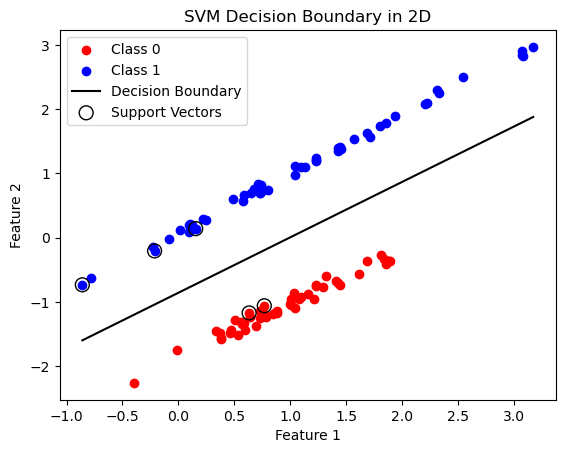

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# 生成二维分类数据
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, 
                           n_clusters_per_class=1, n_redundant=0, random_state=42)

# 训练 SVM 模型
svm_model = SVC(kernel='linear', C=1.0)  # 这里使用线性核
svm_model.fit(X, y)

# 获取决策边界
w = svm_model.coef_[0]
b = svm_model.intercept_[0]
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(w[0] * x_vals + b) / w[1]  # 计算决策边界

# 绘制数据点
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

# 绘制 SVM 决策边界
plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')

# 绘制支持向量
support_vectors = svm_model.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
            s=100, facecolors='none', edgecolors='black', label='Support Vectors')

plt.legend()
plt.title('SVM Decision Boundary in 2D')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


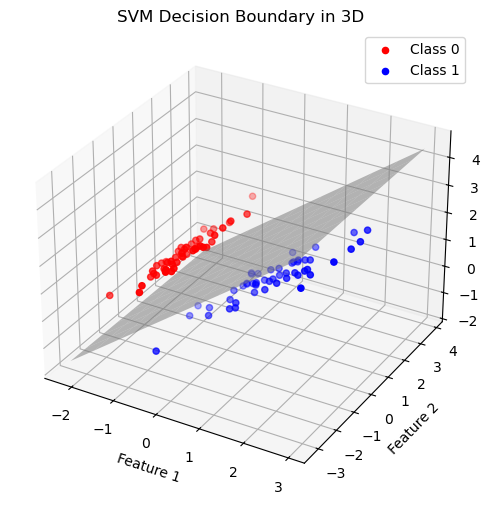

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# 生成三维分类数据
X, y = make_classification(n_samples=100, n_features=3, n_classes=2, 
                           n_clusters_per_class=1, n_redundant=0, random_state=42)

# 训练 SVM 模型（使用线性核）
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X, y)

# 获取决策平面参数
w = svm_model.coef_[0]  # w1, w2, w3
b = svm_model.intercept_[0]

# 创建 3D 图像
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 绘制数据点
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], X[y == 0][:, 2], color='red', label='Class 0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], X[y == 1][:, 2], color='blue', label='Class 1')

# 生成网格点，用于绘制决策平面
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
y_vals = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)

# 计算 Z = -(w1*x + w2*y + b) / w3
Z_grid = -(w[0] * X_grid + w[1] * Y_grid + b) / w[2]

# 绘制决策平面
ax.plot_surface(X_grid, Y_grid, Z_grid, color='gray', alpha=0.5)

# 设置坐标轴
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('SVM Decision Boundary in 3D')
ax.legend()
plt.show()
